In [88]:
import seaborn as sns
import pandas as pd
import numpy as np
import zipfile
import os

import warnings

warnings.filterwarnings('ignore')

# Extract CSV zip files
if not os.path.isfile('mhealth_raw_data.csv'):
    with zipfile.ZipFile('archive.zip', 'r') as zip_ref:
        zip_ref.extractall('.')

m_health_raw_data = pd.read_csv('mhealth_raw_data.csv')

In [89]:
# We see lowest category is 10342 samples
m_health_raw_data['Activity'].value_counts()
# Let's sample 10000 entries for each category

Activity
0     872550
1      30720
2      30720
3      30720
4      30720
9      30720
10     30720
11     30720
5      30720
7      29441
8      29337
6      28315
12     10342
Name: count, dtype: int64

In [90]:
# m_health_data = m_health_raw_data.drop('subject', axis=1)
m_health_data = m_health_raw_data
m_health_data['subject'].unique()
seed=42

df = pd.DataFrame()
for i in m_health_data['Activity'].unique():
    samples = m_health_data[m_health_data['Activity'] == i].sample(random_state=seed, n=10000)
    df = pd.concat([df, samples])

# label encoding Subjects by mapping
map_subj = {
    'subject1': 0,
    'subject2': 1,
    'subject3': 2,
    'subject4': 3,
    'subject5': 4,
    'subject6': 5,
    'subject7': 6,
    'subject8': 7,
    'subject9': 8,
    'subject10': 9
}

ms = df.copy()
ms['subject'] = ms['subject'].map(map_subj)
print(ms.head())

             alx      aly      alz      glx      gly       glz     arx  \
1212350  1.33590  -9.7394 -1.66110  0.58813 -0.58724 -0.662080 -3.2703   
134482   2.52730 -12.7320 -3.88220  0.51763 -0.58537 -0.758350 -4.3463   
820343   0.55205  -9.7466  1.58070  0.55288 -0.76173 -0.176820 -5.8155   
718210   2.49960  -9.3680  1.81700  0.73655 -0.55159  0.068762 -3.0504   
118798  -3.48370  -9.2520  0.54423 -0.37662 -0.61163  0.609040 -6.5952   

              ary      arz       grx      gry      grz  Activity  subject  
1212350  -9.05310 -0.30682  0.401960 -1.06160  0.14655         0        9  
134482  -10.51300  1.71390 -0.272550 -0.76591  0.85129         0        0  
820343   -8.16430 -2.42900  0.137250 -0.99795  0.52155         0        6  
718210   -5.91350  4.65220  0.084314 -0.71047  0.90086         0        5  
118798   -0.79894  7.10590 -0.900000  1.14580  0.81897         0        0  


In [91]:
print(ms['Activity'].value_counts())
display(ms.describe())

Activity
0     10000
1     10000
2     10000
3     10000
4     10000
6     10000
7     10000
8     10000
9     10000
10    10000
11    10000
12    10000
5     10000
Name: count, dtype: int64


,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz,Activity,subject
count,130000.000000,130000.000000,130000.000000,130000.000000,130000.00000,130000.000000,130000.000000,130000.000000,130000.000000,130000.000000,130000.000000,130000.000000,130000.000000,130000.000000
mean,1.712190,-9.092605,-0.833864,0.081737,-0.56323,-0.137402,-3.520445,-5.656282,2.318159,-0.228825,-0.416495,0.358143,6.000000,4.419592
std,4.431388,5.286531,6.568060,0.467020,0.41718,0.554810,6.041450,6.593481,4.251687,0.543354,0.544666,0.528319,3.741672,2.884315
min,-22.146000,-19.609000,-19.365000,-1.777400,-7.78990,-2.622800,-22.345000,-18.972000,-18.230000,-2.219600,-3.552400,-2.504300,0.000000,0.000000
25%,0.082362,-10.137000,-3.664900,-0.374770,-0.81051,-0.591360,-5.221425,-9.535500,0.051838,-0.696080,-0.839840,-0.077586,3.000000,2.000000
50%,1.332000,-9.601300,0.261925,0.172540,-0.69043,-0.123770,-2.504100,-7.562000,1.776100,-0.333330,-0.597540,0.424570,6.000000,4.000000
75%,2.892000,-7.492100,1.771100,0.484230,-0.49719,0.345780,-0.517068,-1.843100,5.181400,0.205880,-0.051335,0.829740,9.000000,7.000000
max,20.033000,21.161000,25.005000,1.705000,1.97750,1.799600,19.801000,21.965000,25.741000,1.429400,1.540000,2.254300,12.000000,9.000000


<Axes: >

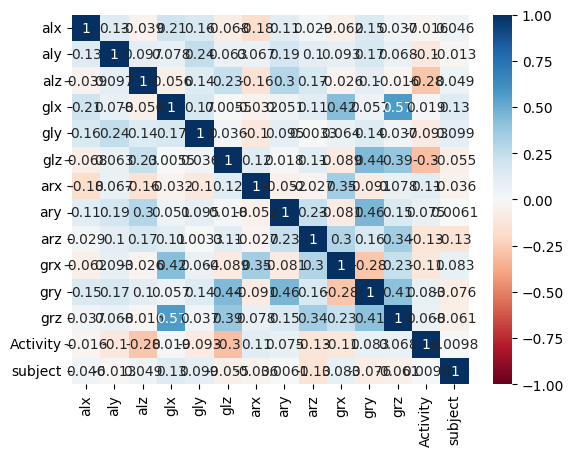

In [92]:
corr = ms.corr(method='spearman')
sns.heatmap(corr, vmin=-1, vmax=1, center=0, annot=True, cmap= 'RdBu')

In [93]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(ms)
print(df_scaled)
print(df_scaled.shape)
df_scaled[:, 12] = df_scaled[:, 12] * 12

df_scaled = pd.DataFrame(df_scaled, columns = df.columns)
df_scaled['Activity'] = round(df_scaled['Activity']).astype(int)
display(df_scaled)
display(df_scaled.describe())
display(df_scaled["Activity"].unique())

print(df_scaled["Activity"].value_counts())

[[0.55672017 0.24207996 0.39900609 ... 0.5570651  0.         1.        ]
 [0.58496645 0.16867795 0.34894749 ... 0.70516328 0.         0.        ]
 [0.53813628 0.24190336 0.47206897 ... 0.63586979 0.         0.66666667]
 ...
 [0.63203253 0.17027226 0.31707235 ... 0.61548985 0.41666667 0.44444444]
 [0.56965552 0.18999264 0.47702727 ... 0.63496407 0.41666667 0.88888889]
 [0.59585102 0.22558254 0.35518819 ... 0.69248308 0.41666667 0.77777778]]
(130000, 14)


,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz,Activity,subject
0,0.556720,0.242080,0.399006,0.679282,0.737418,0.443361,0.452586,0.242297,0.407614,0.718432,0.489121,0.557065,0,1.000000
1,0.584966,0.168678,0.348947,0.659037,0.737610,0.421592,0.427056,0.206635,0.453569,0.533585,0.547186,0.705163,0,0.000000
2,0.538136,0.241903,0.472069,0.669159,0.719554,0.553089,0.392196,0.264008,0.359350,0.645889,0.501620,0.635870,0,0.666667
3,0.584310,0.251190,0.477395,0.721902,0.741068,0.608620,0.457804,0.318990,0.520393,0.631382,0.558073,0.715580,0,0.555556
4,0.442455,0.254035,0.448709,0.402246,0.734921,0.730789,0.373696,0.443927,0.576196,0.361633,0.922591,0.698371,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129995,0.541934,0.244265,0.421269,0.662764,0.752593,0.442027,0.506110,0.248013,0.484872,0.805484,0.571379,0.603713,5,0.333333
129996,0.617452,0.192053,0.353852,0.266391,0.762005,0.422481,0.341157,0.332025,0.301160,0.356259,0.758475,0.499094,5,0.000000
129997,0.632033,0.170272,0.317072,0.579121,0.718593,0.589962,0.468054,0.252913,0.440800,0.476089,0.551218,0.615490,5,0.444444
129998,0.569656,0.189993,0.477027,0.681412,0.840568,0.629500,0.448735,0.128539,0.437142,0.735092,0.625815,0.634964,5,0.888889


,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz,Activity,subject
count,130000.000000,130000.000000,130000.000000,130000.000000,130000.000000,130000.000000,130000.000000,130000.000000,130000.000000,130000.000000,130000.000000,130000.000000,130000.000000,130000.000000
mean,0.565641,0.257944,0.417650,0.533867,0.739877,0.562002,0.446651,0.325273,0.467312,0.545567,0.615801,0.601531,6.000000,0.491066
std,0.105061,0.129667,0.148029,0.134109,0.042712,0.125455,0.143346,0.161064,0.096693,0.148905,0.106957,0.111024,3.741672,0.320479
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.527001,0.232328,0.353845,0.402777,0.714560,0.459352,0.406292,0.230513,0.415770,0.417517,0.532668,0.509964,3.000000,0.222222
50%,0.556628,0.245467,0.442347,0.559941,0.726854,0.565085,0.470766,0.278721,0.454984,0.516928,0.580249,0.615490,6.000000,0.444444
75%,0.593613,0.297201,0.476360,0.649446,0.746638,0.671260,0.517912,0.418421,0.532428,0.664697,0.687508,0.700635,9.000000,0.777778
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000


array([ 0,  1,  2,  3,  4,  6,  7,  8,  9, 10, 11, 12,  5])

Activity
0     10000
1     10000
2     10000
3     10000
4     10000
6     10000
7     10000
8     10000
9     10000
10    10000
11    10000
12    10000
5     10000
Name: count, dtype: int64


In [94]:
# feature expansion magnitude of acceleration
df_scaled['Magnitude Acc'] = np.sqrt(df_scaled['alx']**2 + df_scaled['aly']**2 + df_scaled['alz']**2)
display(df_scaled.columns)
display(df_scaled.describe())

Index(['alx', 'aly', 'alz', 'glx', 'gly', 'glz', 'arx', 'ary', 'arz', 'grx',
       'gry', 'grz', 'Activity', 'subject', 'Magnitude Acc'],
      dtype='object')

,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz,Activity,subject,Magnitude Acc
count,130000.000000,130000.000000,130000.000000,130000.000000,130000.000000,130000.000000,130000.000000,130000.000000,130000.000000,130000.000000,130000.000000,130000.000000,130000.000000,130000.000000,130000.000000
mean,0.565641,0.257944,0.417650,0.533867,0.739877,0.562002,0.446651,0.325273,0.467312,0.545567,0.615801,0.601531,6.000000,0.491066,0.771425
std,0.105061,0.129667,0.148029,0.134109,0.042712,0.125455,0.143346,0.161064,0.096693,0.148905,0.106957,0.111024,3.741672,0.320479,0.124840
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.008111
25%,0.527001,0.232328,0.353845,0.402777,0.714560,0.459352,0.406292,0.230513,0.415770,0.417517,0.532668,0.509964,3.000000,0.222222,0.718911
50%,0.556628,0.245467,0.442347,0.559941,0.726854,0.565085,0.470766,0.278721,0.454984,0.516928,0.580249,0.615490,6.000000,0.444444,0.750956
75%,0.593613,0.297201,0.476360,0.649446,0.746638,0.671260,0.517912,0.418421,0.532428,0.664697,0.687508,0.700635,9.000000,0.777778,0.791310
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,1.726838


<Axes: >

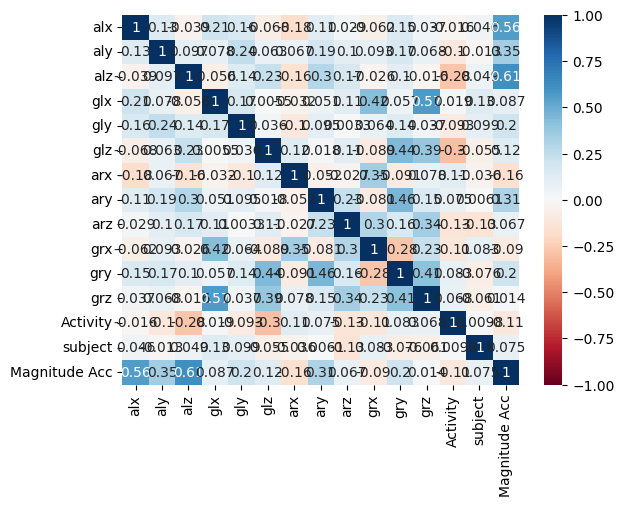

In [95]:
boo = df_scaled.corr(method='spearman')
sns.heatmap(boo, vmin=-1, vmax=1, center=0, annot=True, cmap= 'RdBu')

In [96]:
# we one-hot encoded the Activity column in order to do Logisitic Regression Model on each Activity
df_scaled_one_hot= pd.get_dummies(df_scaled, columns=['Activity'])
print(df_scaled_one_hot.head())

        alx       aly       alz       glx       gly       glz       arx  \
0  0.556720  0.242080  0.399006  0.679282  0.737418  0.443361  0.452586   
1  0.584966  0.168678  0.348947  0.659037  0.737610  0.421592  0.427056   
2  0.538136  0.241903  0.472069  0.669159  0.719554  0.553089  0.392196   
3  0.584310  0.251190  0.477395  0.721902  0.741068  0.608620  0.457804   
4  0.442455  0.254035  0.448709  0.402246  0.734921  0.730789  0.373696   

        ary       arz       grx       gry       grz   subject  Magnitude Acc  \
0  0.242297  0.407614  0.718432  0.489121  0.557065  1.000000       0.726461   
1  0.206635  0.453569  0.533585  0.547186  0.705163  0.000000       0.701714   
2  0.264008  0.359350  0.645889  0.501620  0.635870  0.666667       0.755617   
3  0.318990  0.520393  0.631382  0.558073  0.715580  0.555556       0.795248   
4  0.443927  0.576196  0.361633  0.922591  0.698371  0.000000       0.679441   

   Activity_0  Activity_1  Activity_2  Activity_3  Activity_4  Activ

In [97]:
from sklearn.model_selection import train_test_split

# model for Activity 1
# one-hot for Activity

li = []
for i in range(13):
    li.append('Activity_' + str(i))

# 1/2 is for that activity and 1/2 is not from activity (randomly selected)

X_train, X_test, y_train, y_test = train_test_split(df_scaled_one_hot.drop(li, axis = 1), df_scaled_one_hot['Activity_0'], test_size=0.2, random_state=seed)

display(X_train.head())
display(y_train.head())

,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz,subject,Magnitude Acc
101619,0.478065,0.140741,0.279973,0.678747,0.717633,0.618838,0.027903,0.136551,0.340861,0.460504,0.675815,0.740491,0.888889,0.571611
99268,0.648133,0.192494,0.350174,0.532238,0.720514,0.425590,0.011816,0.009356,0.894021,0.358411,0.588718,0.534420,0.666667,0.761414
123277,0.568539,0.158891,0.319231,0.398515,0.747791,0.381166,0.474439,0.255600,0.440688,0.805484,0.528637,0.498640,0.444444,0.671112
62829,0.582150,0.249723,0.431762,0.729359,0.737034,0.615729,0.556893,0.688035,0.469346,0.801184,0.820976,0.650815,0.777778,0.766602
82514,0.485341,0.254803,0.340690,0.604695,0.731271,0.663262,0.412542,0.201700,0.562550,0.826977,0.629846,0.705163,0.222222,0.645407


101619    False
99268     False
123277    False
62829     False
82514     False
Name: Activity_0, dtype: bool

In [98]:
# Separate the data
activity_0 = df_scaled[df_scaled['Activity'] == 0]
not_activity_0 = df_scaled[df_scaled['Activity'] != 0]

activity_0['Activity'] = 1
not_activity_0['Activity'] = 0


# Shuffle the remaining data
shuffled_remaining_data = not_activity_0.sample(frac=1).reset_index(drop=True)

# Combine half of type A data with half of shuffled remaining data
#half_activity_0 = activity_0.sample(frac=0.5)
half_remaining = shuffled_remaining_data.sample(frac=1/12)

# Concatenate the two halves
final_df = pd.concat([activity_0, half_remaining]).reset_index(drop=True)

print(final_df)
final_df['Activity'].unique()
final_df['Activity'].value_counts()

            alx       aly       alz       glx       gly       glz       arx  \
0      0.556720  0.242080  0.399006  0.679282  0.737418  0.443361  0.452586   
1      0.584966  0.168678  0.348947  0.659037  0.737610  0.421592  0.427056   
2      0.538136  0.241903  0.472069  0.669159  0.719554  0.553089  0.392196   
3      0.584310  0.251190  0.477395  0.721902  0.741068  0.608620  0.457804   
4      0.442455  0.254035  0.448709  0.402246  0.734921  0.730789  0.373696   
...         ...       ...       ...       ...       ...       ...       ...   
19995  0.986510  0.370839  0.023980  0.653707  0.708414  0.557532  0.387059   
19996  0.583904  0.254952  0.488364  0.528509  0.705917  0.492671  0.427011   
19997  0.536315  0.238092  0.456382  0.652642  0.710142  0.468239  0.405690   
19998  0.504270  0.218077  0.358434  0.611618  0.715712  0.594849  0.610160   
19999  0.542556  0.242701  0.455948  0.691000  0.725509  0.641939  0.456300   

            ary       arz       grx       gry      

Activity
1    10000
0    10000
Name: count, dtype: int64

In [99]:
X_train_0, X_test_0, y_train_0, y_test_0 = train_test_split(final_df.drop(['Activity'], axis = 1), final_df['Activity'], test_size=0.2, random_state=seed)


In [100]:
def GenerateReport(model):
    # Checking training error
    y_train_pred = model.predict(X_train)
    accuracy = accuracy_score(y_train, y_train_pred)
    conf_matrix = confusion_matrix(y_train, y_train_pred)
    class_report = classification_report(y_train, y_train_pred)

    # Printing accuracy, precision, and recall
    print("Train Accuracy:", accuracy)
    print("Train Classification Report:")
    print(class_report)

    # Checking testing error
    y_test_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_test_pred)
    conf_matrix = confusion_matrix(y_test, y_test_pred)
    class_report = classification_report(y_test, y_test_pred)

    print("Test Accuracy:", accuracy)
    print("Test Classification Report:")
    print(class_report)

In [101]:
# We will now perform logistic regression with label encoding on the activities.

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

log_reg_model = LogisticRegression(max_iter=1000)

# Fitting the model to the training data
log_reg_model.fit(X_train_0, y_train_0)

GenerateReport(log_reg_model)

Train Accuracy: 0.5920288461538461
Train Classification Report:
              precision    recall  f1-score   support

       False       0.95      0.59      0.73     96019
        True       0.11      0.60      0.18      7981

    accuracy                           0.59    104000
   macro avg       0.53      0.59      0.46    104000
weighted avg       0.88      0.59      0.69    104000

Test Accuracy: 0.5926538461538462
Test Classification Report:
              precision    recall  f1-score   support

       False       0.95      0.59      0.73     23981
        True       0.11      0.61      0.19      2019

    accuracy                           0.59     26000
   macro avg       0.53      0.60      0.46     26000
weighted avg       0.88      0.59      0.69     26000



In [104]:
## Activity n Predictions Classification
for i in range(13):
    print("This is Activity " + str(i) + "'s prediction")
    # Separate the data
    activity = df_scaled[df_scaled['Activity'] == i]
    not_activity = df_scaled[df_scaled['Activity'] != i]
    
    activity['Activity'] = 1
    not_activity['Activity'] = 0
    
    # Shuffle the remaining data
    shuffled_remaining_data = not_activity_0.sample(frac=1).reset_index(drop=True)
    
    # Combine half of data with half of shuffled remaining data
    half_remaining = shuffled_remaining_data.sample(frac=1/12)
    
    # Concatenate the two halves
    final_df = pd.concat([activity, half_remaining]).reset_index(drop=True)

    X_train, X_test, y_train, y_test = train_test_split(final_df.drop(['Activity'], axis = 1), final_df['Activity'], test_size=0.2, random_state=seed)

    log_reg_model = LogisticRegression(max_iter=1000)
    
    # Fitting the model to the training data
    log_reg_model.fit(X_train, y_train)
    
    GenerateReport(log_reg_model)

    

This is Activity 0's prediction
Train Accuracy: 0.59175
Train Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.58      0.59      8019
           1       0.59      0.61      0.60      7981

    accuracy                           0.59     16000
   macro avg       0.59      0.59      0.59     16000
weighted avg       0.59      0.59      0.59     16000

Test Accuracy: 0.58625
Test Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.57      0.58      1981
           1       0.59      0.60      0.59      2019

    accuracy                           0.59      4000
   macro avg       0.59      0.59      0.59      4000
weighted avg       0.59      0.59      0.59      4000

This is Activity 1's prediction
Train Accuracy: 0.8843125
Train Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.77      0.87      8019
           1  

This is Activity 0's fitting graph


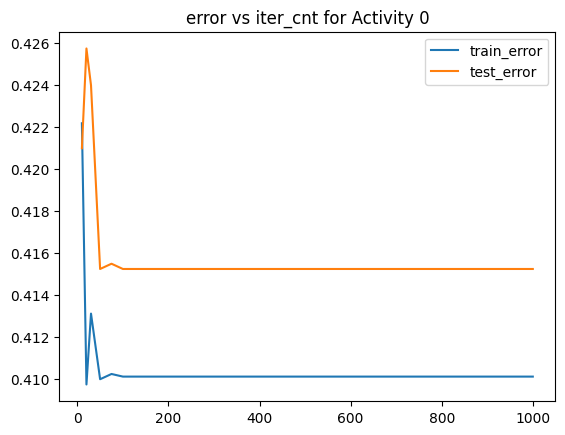

This is Activity 1's fitting graph


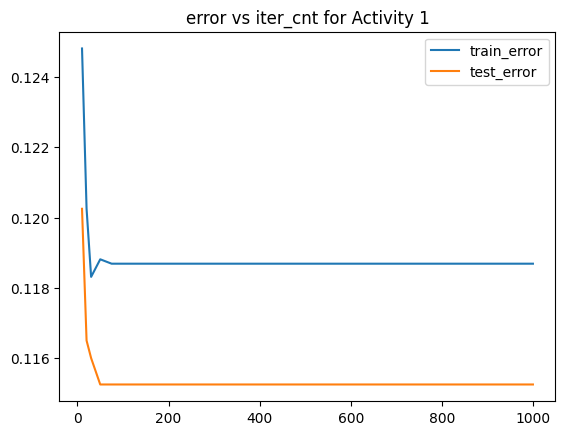

This is Activity 2's fitting graph


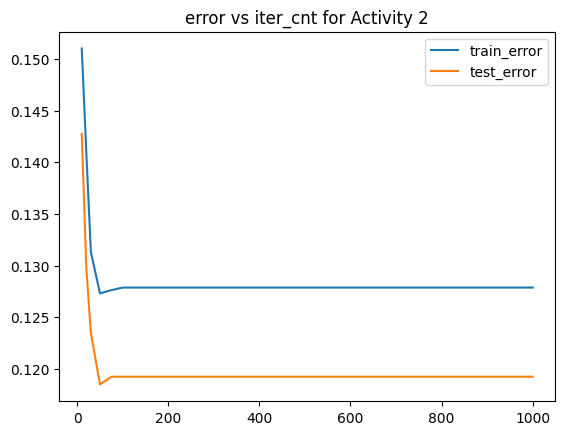

This is Activity 3's fitting graph


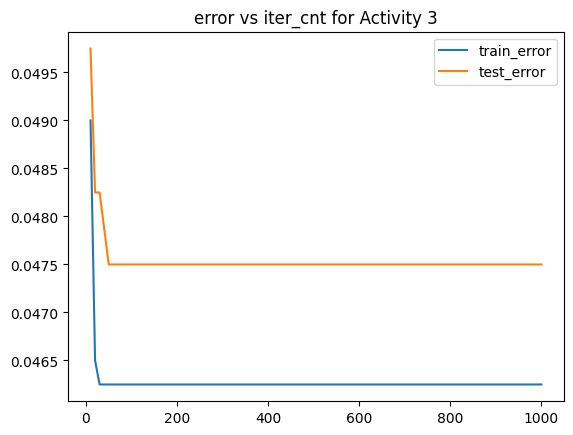

This is Activity 4's fitting graph


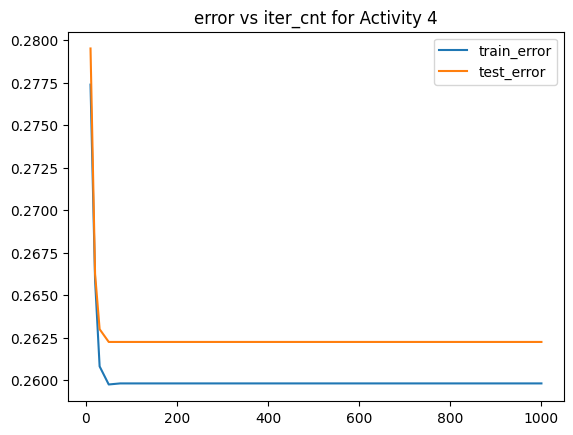

This is Activity 5's fitting graph


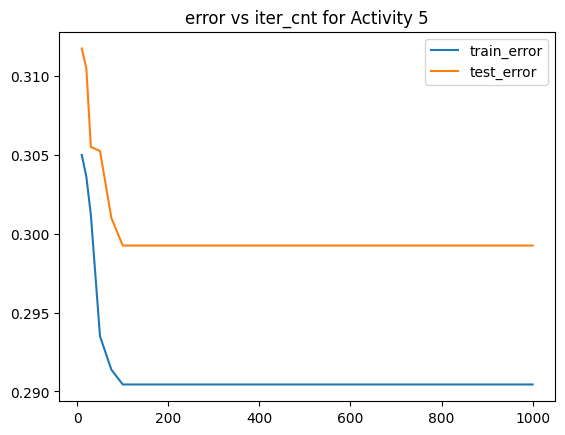

This is Activity 6's fitting graph


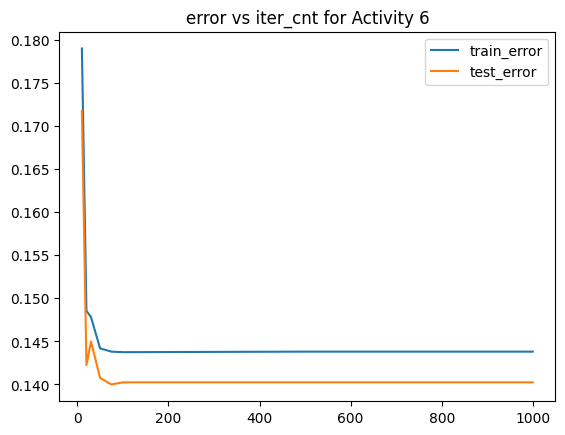

This is Activity 7's fitting graph


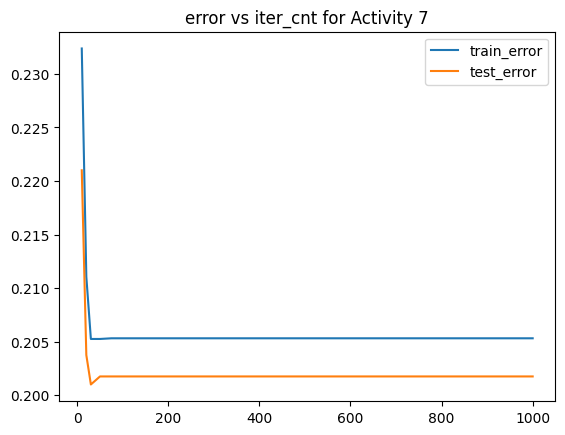

This is Activity 8's fitting graph


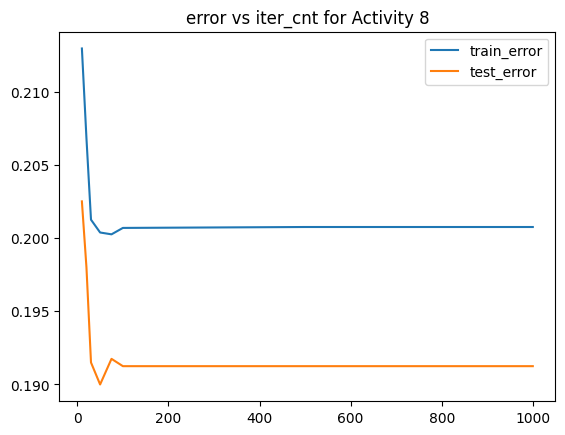

This is Activity 9's fitting graph


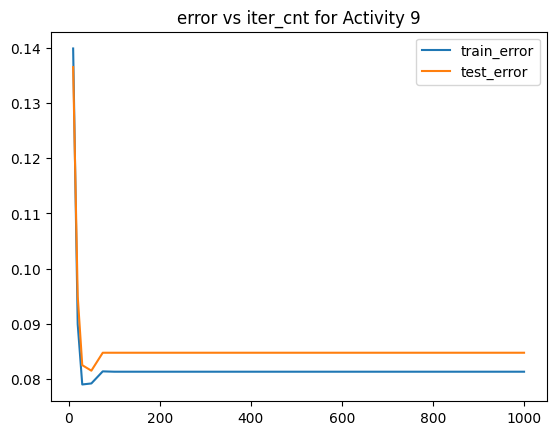

This is Activity 10's fitting graph


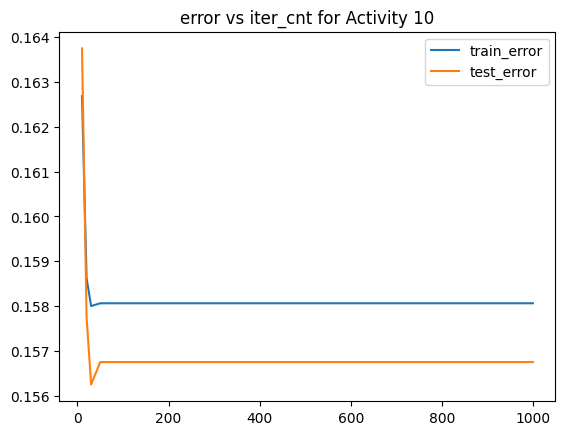

This is Activity 11's fitting graph


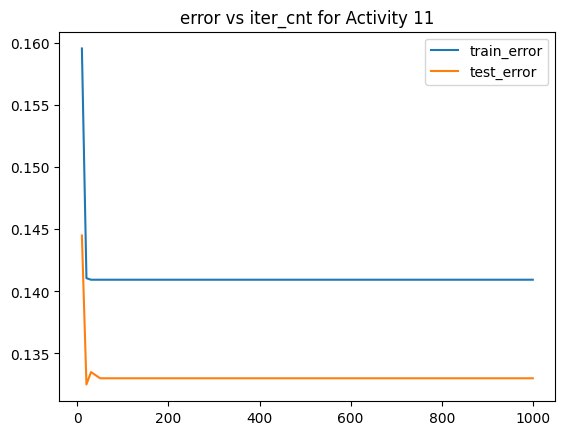

This is Activity 12's fitting graph


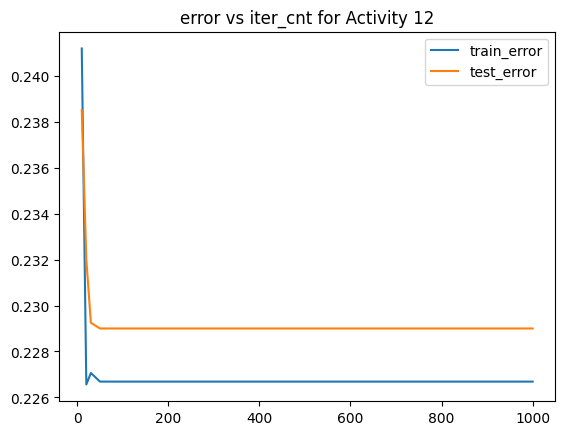

In [109]:
import matplotlib.pyplot as plt

## Activity n Predictions Fitting Graphs (based iteration count)
iter_cnt = [10, 20, 30, 50, 75, 100, 500, 1000]
for i in range(13):
    print("This is Activity " + str(i) + "'s fitting graph")
    # Separate the data
    activity = df_scaled[df_scaled['Activity'] == i]
    not_activity = df_scaled[df_scaled['Activity'] != i]
    
    activity['Activity'] = 1
    not_activity['Activity'] = 0
    
    # Shuffle the remaining data
    shuffled_remaining_data = not_activity_0.sample(frac=1).reset_index(drop=True)
    
    # Combine half of data with half of shuffled remaining data
    half_remaining = shuffled_remaining_data.sample(frac=1/12)
    
    # Concatenate the two halves
    final_df = pd.concat([activity, half_remaining]).reset_index(drop=True)

    X_train, X_test, y_train, y_test = train_test_split(final_df.drop(['Activity'], axis = 1), final_df['Activity'], test_size=0.2, random_state=seed)

    test_error = []
    train_error = []
    for ic in iter_cnt:
        
        log_reg_model = LogisticRegression(max_iter=ic)
        
        # Fitting the model to the training data
        log_reg_model.fit(X_train, y_train)
    
        y_train_pred = log_reg_model.predict(X_train)
        train_error.append(1 - accuracy_score(y_train, y_train_pred))
    
        y_test_pred = log_reg_model.predict(X_test)
        test_error.append(1 - accuracy_score(y_test, y_test_pred))
    
    plt.plot(iter_cnt, train_error, label="train_error")
    plt.plot(iter_cnt, test_error, label="test_error")
    plt.legend()
    plt.title("error vs iter_cnt for Activity " + str(i))
    plt.show()
